<a href="https://colab.research.google.com/github/ValentinCord/HandsOnAI_2/blob/main/NLP_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf sample_data

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [4]:
import os
import numpy as np
np.set_printoptions(edgeitems = 3,
                    infstr = 'inf', 
                    linewidth = 150, 
                    nanstr = 'nan', 
                    precision = 3, 
                    suppress = False, 
                    threshold = 1000, 
                    formatter = None)

# 1. Extraire des *sparse features* avec *TF-IDF*

Resources utiles :
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Importation de scikit-learn et définition d'un corpus de texte

In [7]:
import sklearn.feature_extraction.text as skl_text

corpus = [
  'This is the first document.',
  'This document is the second document.',
  'And this is the third one.',
  'Is this the first document?',
]

## 1.1. Compter le nombre d'occurences des mots dans un corpus

Transformation du corpus avec le compteur de mots

In [8]:
vectorizer = skl_text.CountVectorizer()
X = vectorizer.fit_transform(corpus)

Affichage de la liste des mots présents dans le corpus

In [9]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


Exécutez le bloc de code suivant et observez le tableau affiché. Chaque ligne du tableau correspond à une phrase du corpus. Ainsi, la première ligne correspond à la phrase *'This is the first document.'*.

Chaque colonne correspond à un mot du corpus, dans le même ordre que la liste affichée au bloc précédent.

La valeur indiquée à la ligne *i* et à la colonne *j* correspond au nombre de fois que le mot *j* apparait dans la phrase *i* du corpus.

In [10]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## 1.2. TF-IDF
TF-IDF permet de calculer la fréquence d'apparition d'un mot dans un document, c'est-à-dire le nombre de fois que le mot apparait divisé par le nombre total de mots du document.

Vectorisation du corpus avec TF-IDF

In [11]:
vectorizer = skl_text.TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

Affichage de la liste des mots présents dans le corpus

In [12]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


Exécutez le bloc de code suivant et observez le tableau affiché. Chaque ligne du tableau correspond à une phrase du corpus. Ainsi, la première ligne correspond à la phrase *'This is the first document.'*.

Chaque colonne correspond à un mot du corpus, dans le même ordre que la liste affichée au bloc précédent.

La valeur indiquée à la ligne *i* et à la colonne *j* correspond à la fréquence d'apparition du mot *j* dans la phrase *i* du corpus.

In [13]:
print(X.toarray())

[[0.    0.47  0.58  0.384 0.    0.    0.384 0.    0.384]
 [0.    0.688 0.    0.281 0.    0.539 0.281 0.    0.281]
 [0.512 0.    0.    0.267 0.512 0.    0.267 0.512 0.267]
 [0.    0.47  0.58  0.384 0.    0.    0.384 0.    0.384]]


# 2. Extraire des *dense features* avec *word2vec*

Resources utiles:
* https://radimrehurek.com/gensim/models/word2vec.html
* https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

## 2.1. Téléchargement d'un modèle avec le package gensim

Le code suivant va télécharger des données provenant du package gensim et les stocker dans le dossier *gensim-data* à l'endroit que vous avez indiqué dans la Section 0 du notebook.

Si ces données ont déjà été téléchargées, ce script va immédiatement les charger dans un modèle word2vec stocké dans la variable *glove_model_en*.

In [14]:
import gensim
from gensim import downloader
# Model loading
if os.path.isdir("gensim-data"):
  from gensim.models import KeyedVectors
  glove_model_en = KeyedVectors.load_word2vec_format(os.path.join('gensim-data', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-50.gz'))
else:
  glove_model_en = downloader.load("glove-wiki-gigaword-50")
  os.system('cp -R /root/gensim-data ./gensim-data')

[==================================================] 100.0% 66.0/66.0MB downloaded


Pour voir le nombre de mots présents dans le modèle word2vec, utilisez la fonction *keys()* sur l'attribut *vocab* du modèle :

In [15]:
print("Loaded vocab size %i" % len(glove_model_en.vocab.keys()))

Loaded vocab size 400000


## 2.2. Similarité

Avec un modèle word2vec, chaque mot est représenté par un vecteur spécifique. Pour afficher le vecteur d'un mot, nous pouvons procéder comme suit :

In [16]:
print(glove_model_en['plant']) # Vecteur de features du mot plant

[ 1.317  0.336  0.236  0.949 -0.314  0.499 -0.583 -0.145  0.574 -0.153  0.725 -0.618  0.909 -1.072  0.36   0.771  0.125  2.036 -0.391 -0.792  0.292
 -1.546 -0.358 -0.442 -0.115 -1.179  0.452  0.639  0.818 -0.131  2.539 -1.211 -0.418 -0.426  0.282 -0.059 -0.1    0.844  1.091  0.352 -0.198 -1.135
  0.266 -0.553  1.559  1.082 -0.379 -0.065 -0.726  0.169]


Ces vecteurs sont calculés de sorte que des mots fortement liés dans la langue aient des vectors très proches l'un de l'autre. Cette notion de proximité est la similarité entre les mots. Pour mesurer la similarité entre deux mots, nous pouvons procéder comme suit :

In [17]:
print(glove_model_en.similarity('green','grass')) # Similarité entre le mot green et le mot grass
print(glove_model_en.similarity('green','truck')) # Similarité entre le mot green et le mot truck

0.6456315
0.4142522


*Exercice* - La similarité entre deux mots utilisent un calcul de distance spécifique entre les vecteurs. Quelle est cette distance ? Cosine distance

In [18]:
import math
def norm_vector(x): # calcule la norme du vecteur x
  total = 0
  for i in range(len(x)):
    total += x[i] * x[i]
  return math.sqrt(total)

def compute_similarity(x, y): # calcule la distance entre les vecteurs x et y
  dot = 0
  for i in range(len(x)):
    dot += x[i] * y[i]
  
  return dot / (norm_vector(x) * norm_vector(y))

similarity = compute_similarity(glove_model_en['green'], glove_model_en['grass'])
print(similarity)

0.6456315532940016


Le modèle word2vec propose également une fonction *most_similar* permettant de trouver les mots les plus similaires à un autre (c.-à-d. avec la distance la plus petite).

Dans l'exemple ci-dessous, nous montrons comment obtenir les mots les plus proches de *obama*. Après exécution, nous pouvons constater que les mots les plus proches sont les noms d'autres présidents des Etats-Unis.

L'exemple suivant montre les mots les plus proches de *banana*. On constate qu'il s'agit d'une liste de fruits exotiques.

A chaque mot similaire, on retrouve également la similarité entre le mot proposé et le mot demandé ('obama' ou 'banana' dans nos exemples).

In [19]:
print(glove_model_en.most_similar('obama'))
print(glove_model_en.most_similar('banana'))

[('barack', 0.9674171805381775), ('bush', 0.9642481207847595), ('clinton', 0.9606046080589294), ('mccain', 0.912293553352356), ('dole', 0.8878743052482605), ('gore', 0.8848039507865906), ('hillary', 0.8776552081108093), ('rodham', 0.8401790857315063), ('kerry', 0.8261427879333496), ('biden', 0.8095825910568237)]
[('bananas', 0.8152028322219849), ('coconut', 0.7872510552406311), ('pineapple', 0.757981538772583), ('mango', 0.7556401491165161), ('beet', 0.7212650179862976), ('fruit', 0.7181406617164612), ('sugar', 0.7180197834968567), ('growers', 0.7165752053260803), ('peanut', 0.7018108367919922), ('cranberry', 0.6957995295524597)]


Le modèle word2vec permet également d'afficher la liste des mots les **moins** similaires à un moment. Pour ce faire, nous utilisons l'attribut *negative* de la fonction *most_similar*.

In [20]:
print(glove_model_en.most_similar(negative='obama'))

[('rw97', 0.8754369020462036), ('keyrates', 0.8377940058708191), ('23aou94', 0.8090196847915649), ('k586-1', 0.7933483719825745), ('westrick', 0.7842056155204773), ('kd96', 0.7752095460891724), ('m.sambucetti', 0.7748785614967346), ('horsky', 0.7734301090240479), ('clevelands', 0.7721912264823914), ('tongnam', 0.7674916386604309)]


## 2.3. Arithmétique (analogie)

Les vecteurs denses de word2vec permettent d'utiliser de simples opérations arithmétiques sur ces vecteurs pour en manipuler la signification et donc d'effectuer des raisonnements par analogie.

Par exemple, si on dit "Paris est à la France ce que Bruxelles est à la ___ ". En prenant le vecteur de *France* et en lui soustrayant le vecteur de *Paris* et en ajoutant le vecteur de Bruxelles au résultat, le vecteur obtenu devrait être très proche de celui de Belgique, permettant ainsi de compléter cette phrase, et de résoudre l'analogie.

Dans le bloc de code suivant, nous montrons comment calculer cette analogie.

In [21]:
def analogy(model, x1, x2, y1):
    # Cette fonction revient à trouver le mot le plus similaire au vecteur 
    # calculé comme suit : glove_model_en['france'] - glove_model_en['paris'] + glove_model_en['brussels']
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    print(result[0:4][0:5])

analogy(glove_model_en, 'paris', 'france', 'brussels')

[('eu', 0.8540905117988586), ('belgium', 0.7959123849868774), ('european', 0.7513760924339294), ('luxembourg', 0.7500788569450378)]


## 2.4. Visualisation
Dans cette section, nous allons voir comment nous pouvons visualiser les vecteurs denses utilisés par word2vec.

Importation des packages nécessaires à la visualisation

In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sklearn as skl
from sklearn import decomposition, manifold

Le bout de code suivant utilise **PCA** pour visualiser les vecteurs denses d'une liste prédéfinie de mots.

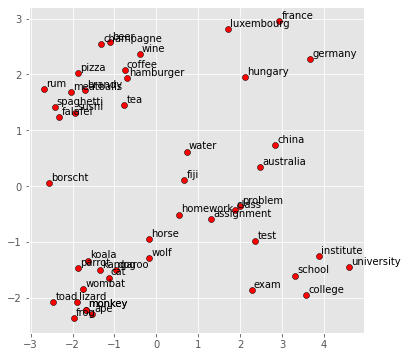

In [23]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = decomposition.PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

display_pca_scatterplot(glove_model_en, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

*Exercice* - Appliquez la même approche, mais en utilisant t-SNE à la place de PCA afin d'avoir une visualisation à plus haute dimension. 

Lien utile : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


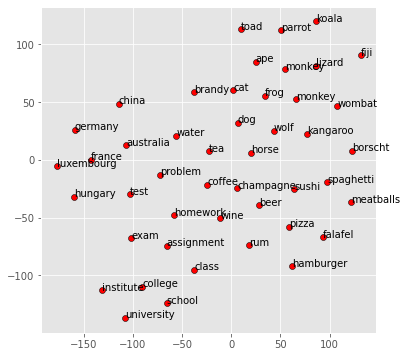

In [28]:
def display_tsne_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = manifold.TSNE().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

display_tsne_scatterplot(glove_model_en, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

# 3. POS et NER
Ressources utiles :
* Pre-trained models: https://spacy.io/models
* POS:
  * https://spacy.io/usage/linguistic-features#pos-tagging
  * https://spacy.io/api/tagger
* NER:
  * https://spacy.io/usage/linguistic-features#named-entities
  * https://spacy.io/api/entityrecognizer
* Other word-level features: https://spacy.io/usage/linguistic-features

## 3.1. Préparation de *spacy*

In [29]:
import spacy

spacy_model_en = spacy.load("en_core_web_sm")

## 3.2. Utilisation de *spacy* sur une phrase anglaise
Dans l'exemple ci-dessous, nous voyons comment utiliser *spacy* pour trouver le lemma et le tag chaque mot d'une phrase.

In [36]:
test_text = "This desert in Egypt has no waters, I must desert you now Sally."
test_analysed = spacy_model_en(test_text)
for token in test_analysed:
  print('\n\nToken : ', token, '\nLemma : ', token.lemma_, '\nType : ', token.pos_)



Token :  This 
Lemma :  this 
Type :  DET


Token :  desert 
Lemma :  desert 
Type :  NOUN


Token :  in 
Lemma :  in 
Type :  ADP


Token :  Egypt 
Lemma :  Egypt 
Type :  PROPN


Token :  has 
Lemma :  have 
Type :  VERB


Token :  no 
Lemma :  no 
Type :  DET


Token :  waters 
Lemma :  water 
Type :  NOUN


Token :  , 
Lemma :  , 
Type :  PUNCT


Token :  I 
Lemma :  I 
Type :  PRON


Token :  must 
Lemma :  must 
Type :  AUX


Token :  desert 
Lemma :  desert 
Type :  VERB


Token :  you 
Lemma :  you 
Type :  PRON


Token :  now 
Lemma :  now 
Type :  ADV


Token :  Sally 
Lemma :  Sally 
Type :  PROPN


Token :  . 
Lemma :  . 
Type :  PUNCT


Effectuez la même chose en français. Pour reprendre notre exemple avec TF-IDF, utilisez la phrase *Le fermier ferme la porte de la ferme* et comparez les résultats au problème que nous avions cité (cfr. Section 1.3.). Pour ce faire, vous aurez besoin d'exécuter la ligne de code suivante. Elle permettra de télécharger les données nécessaires pour utiliser *spacy* sur la langue française (ne l'exécutez pas si vous l'avez déjà téléchargé).

In [ ]:
 !python -m spacy download fr_core_news_lg

In [35]:
spacy_model_fr = spacy.load("fr_core_news_lg")

test_text = "Le fermier ferme la porte de la ferme."
test_analysed = spacy_model_fr(test_text)

for token in test_analysed:
  print('\n\nToken : ', token, '\nLemma : ', token.lemma_, '\nType : ', token.pos_)



Token :  Le 
Lemma :  le 
Type :  DET


Token :  fermier 
Lemma :  fermier 
Type :  NOUN


Token :  ferme 
Lemma :  ferme 
Type :  ADJ


Token :  la 
Lemma :  le 
Type :  DET


Token :  porte 
Lemma :  porte 
Type :  NOUN


Token :  de 
Lemma :  de 
Type :  ADP


Token :  la 
Lemma :  le 
Type :  DET


Token :  ferme 
Lemma :  ferme 
Type :  NOUN


Token :  . 
Lemma :  . 
Type :  PUNCT


# 4. Embeddings avec transformers

Il est possible d'utiliser des réseaux de neurones de type 'transformer' pour calculer des features (descripteurs) représentatifs des mots d'un texte. Ce sont des features denses contextuelles (elle dépendent du contexte du mot). Nous verrons plus tard d'autres utilisations des transformers (prédire des mots manquants dans une phrase par exemple).

Installation de la librairie *transformers*

In [ ]:
!pip install transformers

L'exemple ci-dessous montre comment utiliser un transformer sur une phrase en anglais. Ici, la phrase sera *a dog in a basket*. Nous utiliserons le modèle *BERT* dont l'identifiant au sein de la librairie est *bert-base-uncased*.

In [38]:
from transformers import pipeline, AutoTokenizer
sentence = "a dog in a basket"
model_id = "bert-base-uncased"

Ensuite, nous allons remplacer chaque mot de la phrase par un *token*. Un token est une valeur numérique remplaçant chaque mot et servant de clé d'identification pour retrouver le vecteur d'embedding correspondant au mot.

En exécutant le code suivant, on constate également que le caractère 'espace' a le token 1037.

In [41]:
tokenizer_id = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)
token_seq = tokenizer.encode(sentence)

print("Liste des tokens:", token_seq)

Liste des tokens: [101, 1037, 3899, 1999, 1037, 10810, 102]


Pour obtenir les vecteurs de features de la phrase, nous utilisons ce que nous appelons un *pipeline*. Le code ci-dessous montre d'abord comment récupérer ces vecteurs et comment afficher le vecteur d'embedding d'un token en particulier dans la phrase.

In [42]:
# Récupérer les vecteurs de la phrase 
feature_extraction = pipeline('feature-extraction', model = model_id, tokenizer = tokenizer)
features = feature_extraction(sentence)
print(features)

# Vecteur du premier token
print(features[0][0])

# Vecteur du 2ème token (espace)
print(features[0][1])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[[-0.5583592057228088, 0.13816265761852264, -0.9133316874504089, 0.3335328996181488, 0.04621231183409691, 0.30946552753448486, -0.3202797770500183, 0.6064602136611938, -0.8004055023193359, -0.08307283371686935, 0.1376861333847046, -0.18404708802700043, -0.14090946316719055, 0.6649859547615051, -0.07681351900100708, -0.16315098106861115, -0.2783131003379822, 0.6998043656349182, 0.2837505340576172, -0.33874186873435974, 0.049458861351013184, 0.15315771102905273, -0.7123219966888428, -0.19614405930042267, 0.41632917523384094, 0.24028965830802917, 0.18105646967887878, -0.13385002315044403, 0.37547314167022705, 0.147882342338562, 0.09825761616230011, 0.1659725457429886, 0.1661415696144104, -0.2523080110549927, 0.5285192131996155, -0.8014271259307861, 0.4640961289405823, -0.1241777166724205, -0.49128997325897217, -0.0205779280513525, 0.17082081735134125, 0.015553985722362995, 0.4541962146759033, -0.2808505594730377, 0.39045965671539307, -0.6230786442756653, -2.2546043395996094, 0.0879364088

Pour le faire en français, nous utiliserons le modèle et le *tokenizer* dont les identifiants sont *camembert-base*. Choisissez également une phrase de votre choix en français.

Affichez les tokens de cette phrase, ainsi que les embeddings de celle-ci.

In [45]:
sentence = "Ma phrase à moi est géniale."
model_id = "camembert-base"
tokenizer_id = "camembert-base"


tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)
token_seq = tokenizer.encode(sentence)

print("Liste des tokens : ", token_seq)

# Récupérer les vecteurs de la phrase 
feature_extraction = pipeline('feature-extraction', model = model_id, tokenizer = tokenizer)
features = feature_extraction(sentence)
print("Features : ", features)

# Vecteur du premier token
print("embeddings token 1 : ", features[0][0])

# Vecteur du 2ème token (espace)
print("embeddings token 2 : ", features[0][1])

Liste des tokens :  [5, 769, 3572, 15, 202, 30, 16045, 9, 6]


Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Features :  [[[-0.0010544718243181705, 0.1439327746629715, 0.11019104719161987, -0.12407879531383514, -0.06305617839097977, -0.04562998190522194, 0.0002541440771892667, 0.2182423174381256, 0.06194794923067093, 0.06497929990291595, 0.08099371939897537, 0.12347806245088577, -0.058087579905986786, 0.0562918521463871, 0.21669556200504303, -0.021983660757541656, -0.004190740175545216, -0.05462193861603737, 0.08238481730222702, -0.24006615579128265, 0.06341343373060226, -0.09098684787750244, 0.0024205606896430254, -0.32341957092285156, 0.1808987259864807, -0.15699684619903564, -0.01271890290081501, -0.0592857226729393, -0.020498761907219887, 0.03860490769147873, 0.04397796466946602, -0.20364364981651306, 0.13547320663928986, 0.09582357853651047, 0.18965508043766022, -0.0947115495800972, -0.04652749374508858, 0.14474448561668396, -0.16303987801074982, -0.022654224187135696, -0.20359253883361816, 0.13006140291690826, 0.17673513293266296, -0.03716130927205086, 0.11107567697763443, 0.18849575519

# 4. Exploration personnelle de base de données
Pour vous préparer à la prochaine séance, nous vous invitons à effectuer une petite recherche sur internet sur le sujet des bases de données dédiées au NLP. Existe-t-il des équivalents des DBs ImageNet ou COCO pour le NLP, c.-à-d. des bases de donnés utilisées de manière récurente dans ce domaine.

Le NLP est un domaine complexe aussi parce que les modèles d'IA doivent être entrainés pour chaque langue séparément. Est-ce exact ? N'existe-t-il pas des DBs ou des méthodologies d'apprentissage multilingues ?

Finalement, essayer de télécharger quelques DBs. Utilisez pour ce faire les répertoires et tutoriels proposés : 
* https://huggingface.co/datasets (permet une recherche par type de tâche NLP, par langue, et aussi de restreindre la recherche à un intervalle de taille/volume de la DB)
* https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

Suivez ceci pour savoir comment télécharger l'un des dataset disponibles dans le répertoire huggingface https://huggingface.co/docs/datasets/loading_datasets.html